##Escolha do dataset
<p>
https://www.kaggle.com/datasets/sidhus/crab-age-prediction
<p>
Atributos físicos de Caranguejos encontrados na área de Boston

##Entendimento do negócio
* Objetivo: Prever a idade do caranguejo com base nos atributos físicos.

Muitos países do mundo importam uma enorme quantidade de caranguejos para consumo todos os anos. O negócio comercial de cultivo de caranguejos está desenvolvendo o estilo de vida das pessoas das áreas costeiras.
Para um pescador comercial de caranguejos saber a idade certa do caranguejo ajuda-os a decidir quando colher os caranguejos. Além de uma certa idade, há um crescimento insignificante nas características físicas do caranguejo e, portanto, é importante cronometrar a colheita para reduzir custos e aumentar o lucro.

##Entendimento dos dados

* Sexo: Gênero do caranguejo (Masculino, Feminino, Indefinido)
* Comprimento: Comprimento do caranguejo
* Diâmetro: Diâmetro do caranguejo
* Altura: Altura do caranguejo
* Peso: Peso do caranguejo
* Peso Descascado: Peso do caranguejo sem casca
* Peso das vísceras: é o peso que envolve seus órgãos abdominais profundamente dentro do corpo
* Peso do casco: Peso do casco
* Idade: Idade do caranguejo em meses


*   Apresentar gráficos e métricas de avaliação de atributos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [ ]:
!unzip '/content/caranguejo.zip'

In [ ]:
data = pd.read_csv('/content/CrabAgePrediction.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [ ]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


##Preparação dos dados

####Renomeando Database

In [ ]:
a_renomear = { 
    'Sex' : 'Sexo',
    'Length' : 'Comprimento',
    'Diameter': 'Diametro',
    'Height': 'Altura',
    'Weight': 'Peso',
    'Shucked Weight': 'Peso_Descascado',
    'Viscera Weight': 'Peso_intestino',
    'Shell Weight': 'Peso_casca',
    'Age': 'Idade'

}
data = data.rename(columns=a_renomear) 
data.head()

,Sexo,Comprimento,Diametro,Altura,Peso,Peso_Descascado,Peso_intestino,Peso_casca,Idade
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [ ]:
#Conversão de colunas
a_trocar = {
    'I': 0,
    'F': 1,
    'M': 2
}
data.Sexo = data.Sexo.map(a_trocar, na_action='ignore')
data.head()

,Sexo,Comprimento,Diametro,Altura,Peso,Peso_Descascado,Peso_intestino,Peso_casca,Idade
0,1,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [ ]:
data.dtypes

Sexo                 int64
Comprimento        float64
Diametro           float64
Altura             float64
Peso               float64
Peso_Descascado    float64
Peso_intestino     float64
Peso_casca         float64
Idade                int64
dtype: object

In [ ]:
col_values = data.columns.values

col_values

array(['Sexo', 'Comprimento', 'Diametro', 'Altura', 'Peso',
       'Peso_Descascado', 'Peso_intestino', 'Peso_casca', 'Idade'],
      dtype=object)

<h8>Verificar o relacionamento entre as colunas e a coluna de idade.

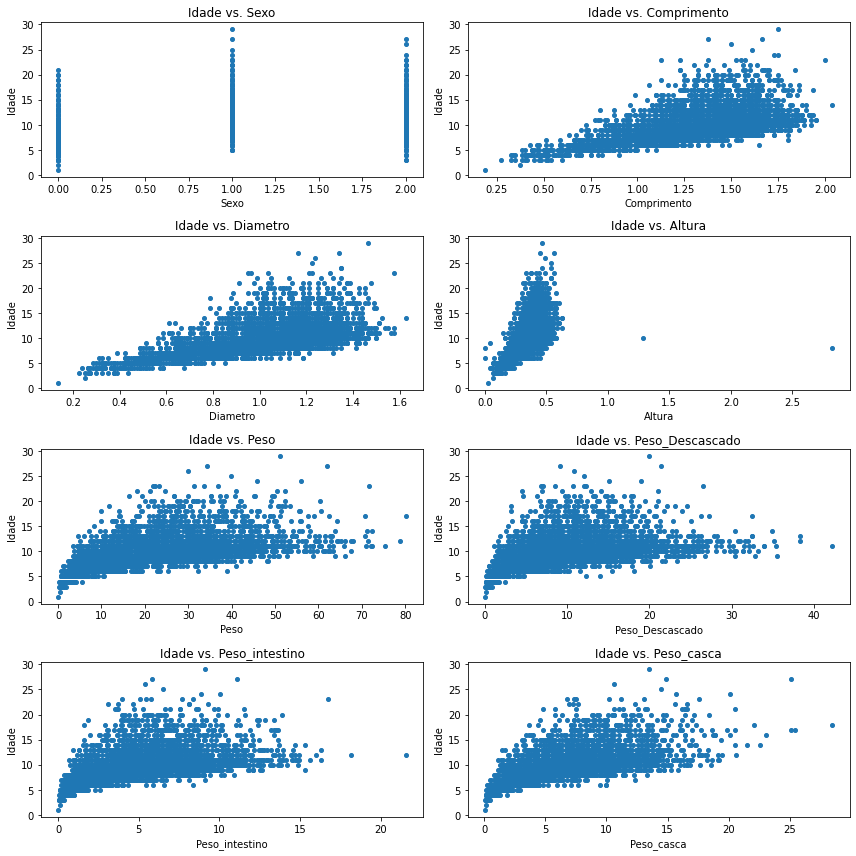

In [ ]:
fig, axis = plt.subplots(4, 2, figsize=(12, 12))

cnt = 0

for i in range(4):
    for j in range(2):
        axis[i, j].plot(data[col_values[cnt]], data["Idade"], 'o', markersize=4)
        axis[i, j].set_xlabel(col_values[cnt], size=10)
        axis[i, j].set_ylabel("Idade", size=10)
        axis[i, j].set_title(f"Idade vs. {col_values[cnt]}", size=12)
        cnt+=1

fig.tight_layout()

####Análise exploratória

<h6>Descrição do Dataset

In [ ]:
data.describe()

,Sexo,Comprimento,Diametro,Altura,Peso,Peso_Descascado,Peso_intestino,Peso_casca,Idade
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.051888,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.826327,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,0.000000,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.000000,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,2.000000,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


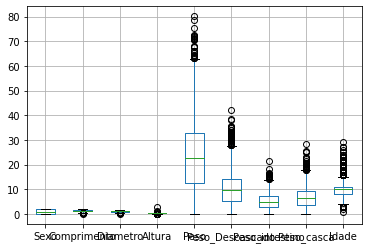

In [ ]:
#Boxplot
data.boxplot()

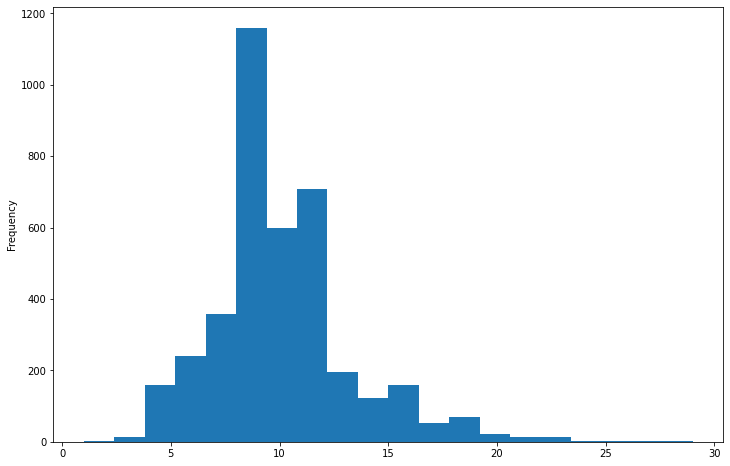

In [ ]:
data['Idade'].plot.hist(bins=20, figsize=(12,8))

####Mapa de calor de correlação e correlação


In [ ]:
# correlação de Aluguel de Bicicletas versus as variáveis de descanso
data.drop('Idade', axis=1).corrwith(data.Idade)

Sexo               0.353045
Comprimento        0.554973
Diametro           0.573844
Altura             0.551956
Peso               0.538819
Peso_Descascado    0.418760
Peso_intestino     0.501328
Peso_casca         0.625195
dtype: float64

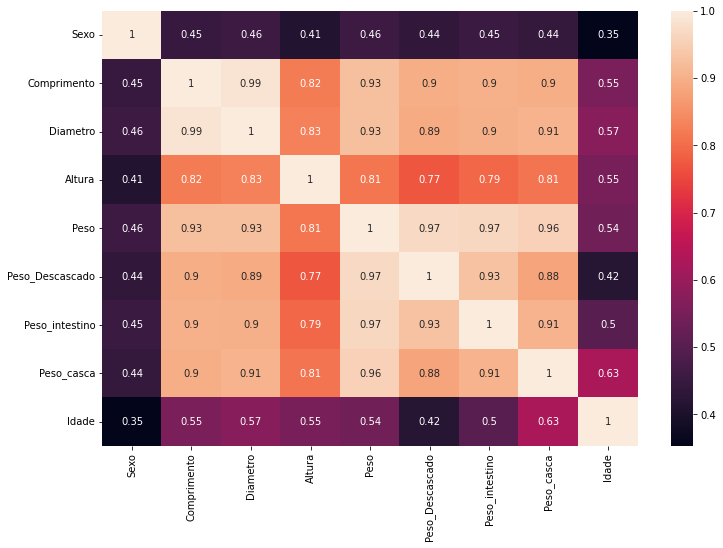

In [ ]:
#Gerar a correlação usando heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

####Multi colineariade
As colunas Comprimento e Altura estão fortemente correlacionados causando um problema de muticolinearidade então vamos remover a coluna Altura.

In [ ]:
#Remover a coluna Altura
data.drop('Altura', axis=1, inplace=True)

#### Teste de hipóteses e aprendizado de máquina


In [ ]:
# Executar one-hot encoding em toda a base
data = pd.get_dummies(data)

####Checando valores ausentes


In [ ]:
#Verificar se há dados ausentes
data.isna().sum()

Sexo               0
Comprimento        0
Diametro           0
Peso               0
Peso_Descascado    0
Peso_intestino     0
Peso_casca         0
Idade              0
dtype: int64

####Checando valores duplicados

In [ ]:
#Verificar se há dados duplicados
data.duplicated().sum()

0

In [ ]:
data.shape

(3893, 8)

####Train-Test Dataset

In [ ]:
# Separe os atributos X e a variável alvo (y)
y = data.Idade
X = data.drop(['Idade'], axis = 1)

In [ ]:
#Separe os dados de treino e teste (X_train, X_test, y_train, y_test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2.5, random_state=5)

##Modelagem e Avaliação







###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

<h9>Validação
<p>MAE, MSE e RMSE - Calculam a diferença entre o valor predito e o valor real
<p>R2 - Percentual de dados que é explicado pelo modelo

In [ ]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, predictions))

MEA 1.966


In [ ]:
print("MSE", metrics.mean_squared_error(y_test, predictions))

MSE 8.735916


In [ ]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE 2.955658302307626


In [ ]:
print("R2", np.sqrt(metrics.r2_score(y_test, predictions)))

R2 0.6160774467991387


<h8>Validação cruzada - Método K-fold

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

In [ ]:
from numpy.core.numeric import cross
kf = KFold(n_splits=10, shuffle=True, random_state=25)
random_forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=20, min_samples_split=2)
cv_score = cross_val_score(random_forest, X_train, y_train, scoring='r2', cv=kf)
cv_score

array([0.46884876, 0.58502157, 0.52177713, 0.5633155 , 0.54281825,
       0.52939209, 0.49716151, 0.59493156, 0.52234744, 0.55636524])

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [ ]:
predi= random_forest.predict(X_test)

In [ ]:
print("MEA", metrics.mean_absolute_error(y_test, predi))
print("MSE", metrics.mean_squared_error(y_test, predi))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predi)))
print("R2", np.sqrt(metrics.r2_score(y_test, predi)))

MEA 1.8967414537033833
MSE 8.523315659468809
RMSE 2.9194718117270475
R2 0.6282124453225845


In [ ]:
error_AX = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': predi.flatten()})
error_AX.head(10)

,Actual-Values,Predicted-Values
0,13,13.001667
1,11,9.480000
2,12,11.291667
3,19,9.790000
4,10,7.380000
5,13,9.879667
6,21,12.565000
7,7,8.660000
8,11,10.396695
9,12,10.825846


In [ ]:
print(f'Precisão do modelo: {random_forest.score(X, y)}')

Precisão do modelo: 0.9297417876351374


In [ ]:
#Verificando variável mais importante do Random Forest
feat_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
Peso_casca,0.505876
Peso_Descascado,0.170590
Peso,0.095472
Peso_intestino,0.085112
Diametro,0.055914
Comprimento,0.055416
Sexo,0.031619


<h8>Tunig [GridSearch]

In [ ]:
#Hiperparametros
n_estimator = [5, 20, 50, 100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [3, 4, 7]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimator, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_leaf, 'bootstrap':bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor() 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfR_random = RandomizedSearchCV(estimator=rfR,param_distributions = random_grid, n_iter=100, cv=5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rfR_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [3, 4, 7],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
#Retornar melhor parametro
print('Random grid:', random_grid, '\n')
print('Melhor parametro:', rfR_random.best_params_,'\n')

Random grid: {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [3, 4, 7], 'bootstrap': [True, False]} 

Melhor parametro: {'n_estimators': 100, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True} 



In [ ]:
from pandas._libs.algos import rank_2d
#Aplicando o melhor parametro a predicação
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split= 7, max_features= 'sqrt', max_depth = 90, bootstrap = True)
randmf.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_split=7)

In [ ]:
#Comparando valor previsto do valor real
y_pred_rf1 = pd.DataFrame({"Actual": y_test, "predicted_prob": randmf.predict((X_test))})
y_pred_rf1

,Actual,predicted_prob
1186,13,12.659813
428,11,9.365082
2228,12,11.028802
1606,19,10.453967
3395,10,8.147439
3572,13,9.743714
517,21,12.259584
1181,7,8.643778
3682,11,10.545759
1125,12,10.900389


###Rede neural e Keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
dataset = data.copy()
dataset.head()

,Sexo,Comprimento,Diametro,Peso,Peso_Descascado,Peso_intestino,Peso_casca,Idade
0,1,1.4375,1.1750,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,7.952035,3.231843,1.601747,2.764076,6
3,1,1.1750,0.8875,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,6.903103,3.458639,1.488349,1.700970,6


<h8>One-Hot encoding

In [ ]:
for col in dataset.columns:
  print(f" col {col} , Qtd de valores únicos: {len(dataset[col].unique())} , {list(dataset[col].unique())} \n ")

 col Sexo , Qtd de valores únicos: 3 , [1, 2, 0] 
 
 col Comprimento , Qtd de valores únicos: 134 , [1.4375, 0.8875, 1.0375, 1.175, 1.55, 1.3, 1.325, 1.5875, 0.9125, 0.825, 1.3625, 0.8625, 1.375, 1.225, 1.6375, 1.6, 1.0625, 1.475, 0.7625, 1.1125, 1.625, 0.925, 0.575, 1.2625, 1.3375, 1.525, 1.575, 1.0875, 1.25, 1.4875, 1.4, 1.0125, 0.75, 1.05, 0.8, 1.7, 1.5125, 1.725, 1.1375, 1.8, 1.3125, 1.775, 0.6875, 1.075, 1.6125, 1.6875, 1.275, 1.4625, 0.7, 0.875, 1.125, 1.35, 1.9375, 1.85, 1.5, 1.2, 1.425, 0.7375, 1.7375, 1.5625, 1.5375, 0.9875, 0.675, 1.65, 0.975, 1.2125, 1.3875, 0.775, 0.9625, 0.8375, 1.7875, 1.1, 1.0, 1.6625, 1.7125, 1.2875, 1.1625, 0.95, 0.4625, 1.1875, 1.675, 1.15, 1.75, 1.025, 0.725, 0.9, 1.4125, 1.45, 1.2375, 1.8375, 1.825, 0.7875, 1.7625, 0.35, 0.9375, 0.85, 0.7125, 0.6125, 1.875, 0.5875, 0.6, 0.8125, 1.8875, 2.0, 1.95, 0.45, 0.6375, 0.4875, 0.625, 1.8125, 0.3875, 0.5, 1.9, 0.275, 0.475, 0.5625, 0.65, 0.55, 0.525, 0.4, 0.4125, 0.375, 1.8625, 0.325, 0.5375, 0.5125, 0.1875, 

In [ ]:
oneHot = dataset.pop('Sexo')
oneHot

0       1
1       2
2       0
3       1
4       0
       ..
3888    1
3889    1
3890    0
3891    0
3892    0
Name: Sexo, Length: 3893, dtype: int64

In [ ]:
dataset['Femea'] = (oneHot == 0)*1.0
dataset['Macho'] = (oneHot == 1)*1.0
dataset['Indifinido'] = (oneHot == 2)*1.0
dataset.tail()

,Comprimento,Diametro,Peso,Peso_Descascado,Peso_intestino,Peso_casca,Idade,Femea,Macho,Indifinido
3888,1.4625,1.1375,24.819987,11.651644,5.854172,6.378637,8,0.0,1.0,0.0
3889,1.5500,1.2125,34.458817,15.450477,7.172423,9.780577,10,0.0,1.0,0.0
3890,0.6250,0.4625,2.012815,0.765436,0.524466,0.637864,5,1.0,0.0,0.0
3891,1.0625,0.7750,10.347568,4.507570,2.338834,2.976698,6,1.0,0.0,0.0
3892,0.7875,0.6125,4.068153,1.502523,1.346601,1.417475,8,1.0,0.0,0.0


In [ ]:
#Adquirindo 70% dos dados
split = 0.7

In [ ]:
#Dados de treinamento
train_dataset = dataset.sample(frac=split,random_state=0)

In [ ]:
#Dados de teste
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
#Verificando as colunas que seram utilizadas
dataset.columns

Index(['Comprimento', 'Diametro', 'Peso', 'Peso_Descascado', 'Peso_intestino',
       'Peso_casca', 'Idade', 'Femea', 'Macho', 'Indifinido'],
      dtype='object')

In [ ]:
#Criando nova variavel que representa as estatísticas dos dados
train_stats = train_dataset.describe()
train_stats.pop("Idade")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Comprimento,2725.0,1.319771,0.299368,0.187500,1.137500,1.375000,1.550000,2.037500
Diametro,2725.0,1.027982,0.247518,0.137500,0.875000,1.062500,1.212500,1.625000
Peso,2725.0,23.983630,14.043048,0.056699,12.813974,23.374163,33.424061,80.101512
Peso_Descascado,2725.0,10.369373,6.304903,0.028349,5.443104,9.766403,14.472420,38.300174
Peso_intestino,2725.0,5.218175,3.130839,0.014175,2.693202,4.918638,7.299996,21.545620
Peso_casca,2725.0,6.931468,4.024176,0.042524,3.827183,6.761356,9.497082,28.491248
Femea,2725.0,0.309358,0.462314,0.000000,0.000000,0.000000,1.000000,1.000000
Macho,2725.0,0.310826,0.462917,0.000000,0.000000,0.000000,1.000000,1.000000
Indifinido,2725.0,0.379817,0.485430,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
train_labels = train_dataset.pop('Idade')
test_labels = test_dataset.pop('Idade')

<h8>Normalização dos dados

In [ ]:
def padroniza(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = padroniza(train_dataset)
normed_test_data = padroniza(test_dataset)

In [ ]:
normed_test_data.shape

(1168, 9)

In [ ]:
normed_train_data.shape

(2725, 9)

In [ ]:
#Construindo o modelo usando a rede neural Keras
def constroi_modelo():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='re lu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = constroi_modelo()
model

<h8>Treinamento do modelo

In [ ]:
class MostraProgresso(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    print('-', end='')

In [ ]:
EPOCHS = 1000

In [ ]:
#Acuracia de treianamento e validação
history = model.fit(
    x=normed_train_data,
    y=train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0,
    callbacks=[MostraProgresso()]
)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

In [ ]:
#Progresso do armazenamento
historico = pd.DataFrame(history.history)
historico['epoch'] = history.epoch
historico.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.508125,1.163669,2.508125,7.444786,2.052758,7.444786,995
996,2.507752,1.165173,2.507752,6.566469,1.859902,6.566469,996
997,2.503916,1.161392,2.503916,6.368272,1.804294,6.368272,997
998,2.503985,1.154021,2.503985,6.084190,1.770988,6.084190,998
999,2.509909,1.161674,2.509909,6.220914,1.768415,6.220914,999


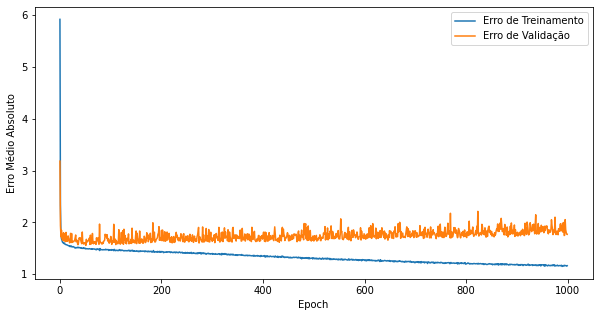

In [ ]:
def plota_historico(history, limita=False):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Erro Médio Absoluto')
  plt.plot(hist['epoch'], hist['mae'],
           label='Erro de Treinamento')
  plt.legend(loc='best', fontsize=25)
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Erro de Validação')
  plt.legend(loc='best', fontsize=15)
  if limita == True:
    plt.ylim([0,5])
  plt.legend()
  plt.show()


plota_historico(history)


---------------------------------------------------

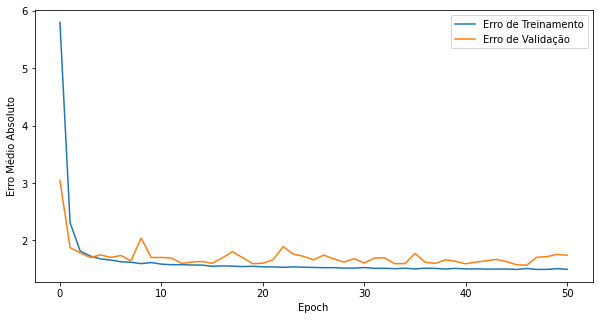

In [ ]:
#O model.fit para automaticamente o treinamento quando o validation score não aumentar mais.
model = constroi_modelo()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, MostraProgresso()])

plota_historico(history)

<h8>Previsões

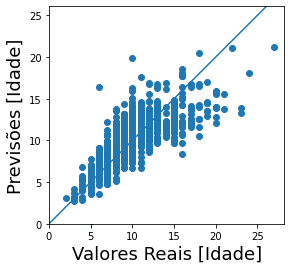

In [ ]:
previsoes_teste = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, previsoes_teste)
plt.xlabel('Valores Reais [Idade]', fontsize=18)
plt.ylabel('Previsões [Idade]', fontsize=18)
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(test_labels, previsoes_teste))

MEA 1.5398929746285692


In [ ]:
print("MSE", metrics.mean_squared_error(test_labels, previsoes_teste))

MSE 4.346977110827927


In [ ]:
print("RMSE", np.sqrt(metrics.mean_squared_error(test_labels, previsoes_teste)))

RMSE 2.084940553307918
